# HAZARD AND RISK ANALYSIS FOR AIRCRAFTS OPERATIONS

## Introduction

The overrall safety of an aircraft is determined by  many factors. The choice of an aircraft impacts the safety, efficiency and profitability of a business.

As the aviation industry is regularly a subject to unpredictable market conditions and mantainance challenges, understanding which type of aircrafts present lower risk is essential.

Geographical locations and weather conditions among other forces of nature, also, can introduce operational hazards that impact flight safety and perfomance.

In this analysis, I collected data from [kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) to visually represent these factors.

#### For a non-technical presentation of the data refer to this [link](https://github.com/felix-musau/phase_1_project/blob/main/presentation.pdf)
#### for a Tableau presentation, refer to this [link](https://public.tableau.com/app/profile/felix.musau3046/viz/Aviation_analysis_17507632970630/Dashboard1)

### Objectives
- Data Cleaning
- Perform Exploratory Data Analysis
- To collect findings and visualize them
- To come up with business recommendations and steps foward
  

## 1. Business Understanding
Accidents are mostly inevittable. However, identifying patterns that led to these accidents in the past may help tailor our decission as we dive into this industry.

As a team aspiring to venture into the aviation industry, we are curious about:

1. Is air as a mode of transport becoming safer with time
2. What is the effect of weather conditions to aircraft accidents
3. Do varying engine types present different levels of risk
4. Is there a correlation between an aircraft make and its damage
5. Effect of flight purpose to accidents
6. What category of an aircraft is safer

## 2. Data Understanding
For this research, we collected data from kaggle which contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possesions, and in international waters.

Each record(row) represents information about a certain plane accident incident.

Each column contains a different type of data related to that incident. We are mostly dealing with the following columns:

- `Event.Date` : The date when the accident occured
- `Location` : The state/ exact place where the accident occured
- `Airport.Name` : The airport where the subject plane took off from
- `Injury.Severity` : How critical were the inuries from the accident
- `Aircraft.Damage` : The impact of the crash on the plane
- `Make` : The type of aircraft
- `Total.Fatal.Injuries` 
- `Total.Serious.Injuries`
- `Total.Minor.Injuries`
- `Total.Uninjured`
- `Weather.Condition`
  
Among other categories as we shall explore later in the analysis

## Loading the dataset

In [8]:
# We import the required python libraries which will be used in this analysis
#Importing pandas
import pandas as pd
# importing numpy
import numpy as np
#importing seaborn
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Read the data into a pands dataset ans assign the variable name df to it 
df= pd.read_csv('AviationData.csv', encoding = 'latin1', low_memory = False)
# Read the first five rows of the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## 3. Data Cleaning

We start by identifying the characteristics of our dataset

In [12]:
#Check for datatypes and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [15]:
#Checks the null values in the data
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

Our dataset has many missing values. We need a solution about that 

We first calculate what percentage of our data is missing in each column:

In [18]:
round((df.isnull().sum()/ len(df))*100,2)
#round off to 2 decimal places

Event.Id                   0.00
Investigation.Type         0.00
Accident.Number            0.00
Event.Date                 0.00
Location                   0.06
Country                    0.25
Latitude                  61.32
Longitude                 61.33
Airport.Code              43.60
Airport.Name              40.71
Injury.Severity            1.12
Aircraft.damage            3.59
Aircraft.Category         63.68
Registration.Number        1.55
Make                       0.07
Model                      0.10
Amateur.Built              0.11
Number.of.Engines          6.84
Engine.Type                7.98
FAR.Description           63.97
Schedule                  85.85
Purpose.of.flight          6.97
Air.carrier               81.27
Total.Fatal.Injuries      12.83
Total.Serious.Injuries    14.07
Total.Minor.Injuries      13.42
Total.Uninjured            6.65
Weather.Condition          5.05
Broad.phase.of.flight     30.56
Report.Status              7.18
Publication.Date          15.49
dtype: f

Different columns have different percentages of their data missing, with `Schedule` column having the highest at 85.85%. 

we are going to eliminate some of these columns out of the dataset; Those missing over 70% of the data

Our dataset contains many missing values, so we can filter mainly the columns we need for this analysis.



In [22]:
# Identify relevant columns
relevant_columns = ['Event.Date', 'Country', 'Location','Injury.Severity','Model','Longitude', 'Latitude', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition']

In [24]:
#Create a dataframe df_relevant that we will use for the rest of analysis
df_relevant = df[relevant_columns]
df_relevant.head()

,Event.Date,Country,Location,Injury.Severity,Model,Longitude,Latitude,Aircraft.damage,Aircraft.Category,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,1948-10-24,United States,"MOOSE CREEK, ID",Fatal(2),108-3,NaN,NaN,Destroyed,NaN,Stinson,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,1962-07-19,United States,"BRIDGEPORT, CA",Fatal(4),PA24-180,NaN,NaN,Destroyed,NaN,Piper,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,1974-08-30,United States,"Saltville, VA",Fatal(3),172M,-81.878056,36.922223,Destroyed,NaN,Cessna,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,1977-06-19,United States,"EUREKA, CA",Fatal(2),112,NaN,NaN,Destroyed,NaN,Rockwell,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,1979-08-02,United States,"Canton, OH",Fatal(1),501,NaN,NaN,Destroyed,NaN,Cessna,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


In [26]:
#Check for missing values in the new defined dataset
df_relevant.isna().sum().sort_values(ascending=False)

Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Injury.Severity            1000
Country                     226
Model                        92
Make                         63
Location                     52
Event.Date                    0
dtype: int64

In [28]:
#Checks for the values in the make column
df_relevant["Make"].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

As from above, `Cessna` and `CESSNA` may be reffering to the same make but due to the case sensitivity of of python, they are portrayed as different. This can be corrected as below:

In [31]:
df_relevant['Make'] = df_relevant['Make'].str.upper().str.strip()

C:\Users\USER\AppData\Local\Temp\ipykernel_23116\431169931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Make'] = df_relevant['Make'].str.upper().str.strip()


In [33]:
df_relevant['Make'] .value_counts()

Make
CESSNA           27149
PIPER            14870
BEECH             5372
BOEING            2745
BELL              2722
                 ...  
COHEN                1
KITCHENS             1
LUTES                1
IZATT                1
ROYSE RALPH L        1
Name: count, Length: 7587, dtype: int64

#### We can use the `Make` column to fill missing values for `Aicraft.Category` column. Here is how:

In [36]:
filtered_df = df[df['Aircraft.Category'].notna()]
#To ensure that the condition applies to those values that are not null
make_category_map = filtered_df.groupby('Make')['Aircraft.Category'].apply(
    lambda x: x.mode().iloc[0]
)

In [38]:
df_relevant['Aircraft.Category'] = df_relevant['Aircraft.Category'].fillna(df_relevant['Make'].map(make_category_map))

C:\Users\USER\AppData\Local\Temp\ipykernel_23116\267209251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Aircraft.Category'] = df_relevant['Aircraft.Category'].fillna(df_relevant['Make'].map(make_category_map))


In [39]:
df_relevant.isna().sum().sort_values(ascending=False)

Longitude                 54516
Latitude                  54507
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Aircraft.Category          5746
Weather.Condition          4492
Aircraft.damage            3194
Injury.Severity            1000
Country                     226
Model                        92
Make                         63
Location                     52
Event.Date                    0
dtype: int64

In [40]:
 round(df_relevant.isnull().sum().sum() / df_relevant.size * 100,2)

11.56

AS for now, only 11% of our data is missing. we can get rid of this data since it is not that significant


In [42]:
df_relevant = df_relevant.dropna().reset_index(drop =True)

In [48]:
# Checks the % of missing values in the data. should be 0
df_relevant.isnull().sum().sum() / df_relevant.size * 100

0.0

Now we have a clean data with the relevants columns We can begin our analysis

## Exploratory Data Analysis

In [52]:
# Lets identify the shape of oue sample dataset
df_relevant.shape

(16882, 18)

In [54]:
df_relevant.head()

,Event.Date,Country,Location,Injury.Severity,Model,Longitude,Latitude,Aircraft.damage,Aircraft.Category,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,1998-12-17,United States,"LOS ANGELES, CA",Non-Fatal,55B,-118.413611,33.948611,Substantial,Airplane,LEARJET,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,7.0,VMC
1,1999-05-06,United States,"PLYMOUTH, MA",Fatal(1),PA28RT-201T,-70.728611,41.908889,Destroyed,Airplane,PIPER,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC
2,1999-07-13,United States,"MINDEN, NV",Fatal(2),NIMBUS 4DM,-119.672778,38.981667,Destroyed,Glider,SCHEMPP-HIRTH,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC
3,1999-10-15,United States,"Ventura, CA",Fatal(2),152,-119.335555,34.294444,Destroyed,Airplane,CESSNA,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC
4,1999-11-27,United States,"PHILADELPHIA, MS",Fatal(2),212,-88.926111,32.784444,Destroyed,Helicopter,BELL,1.0,Turbo Shaft,Positioning,2.0,0.0,0.0,0.0,VMC


### Accident trends over time

In [57]:
# Convert event time to a timeframe and perform analysis
df_relevant['Event.Date'] = pd.to_datetime(df_relevant['Event.Date'])

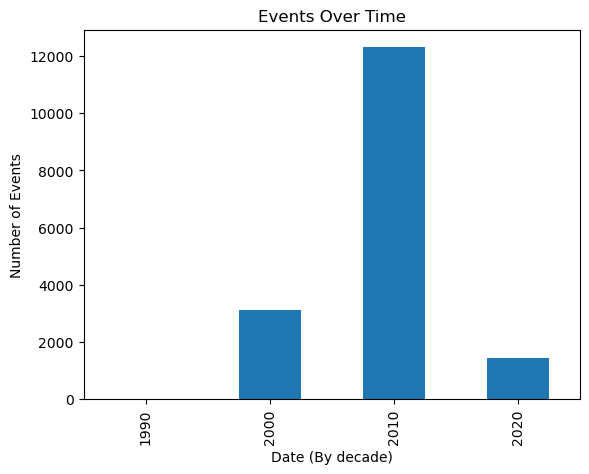

In [59]:
#visualize
events_per_year = df_relevant.groupby(df_relevant['Event.Date'].dt.year // 10 * 10).size()
events_per_year.plot(kind='bar')
plt.xlabel('Date (By decade)')
plt.ylabel('Number of Events')
plt.title('Events Over Time')
plt.show()

In [61]:
# Grouped by decade
events_per_year

Event.Date
1990        6
2000     3123
2010    12301
2020     1452
dtype: int64

In [63]:
print(f"{events_per_year.sum()} Are the total number of accidents in this sample dataset")

16882 Are the total number of accidents in this sample dataset


#### Let's calculate the percentage increase or dicrease in accidents in the decades

In [66]:

avg_increase_1 = abs((6-3123)/16882)*100
avg_increase_1

18.46345219760692

In [68]:
avg_increase_2 = abs((3123-12301)/16882)*100
avg_increase_2

54.36559649330648

In [70]:
avg_decrease_3= ((12301-1452)/16882)*100
avg_decrease_3

64.26371283023339

#### The above plot visualizes the occurances of accidents over the years grouped by decade.
- In the first decade, there were no airplane crashes. This is because air was not used as a means of transport
- The second decade shows that there were fewer accidents (as compared to the following decade). Air transport had been introduced but was not very popular.
- The third decade is where the most accidents occured. Air transport had been highly adapted but safety measures were not implemented.
- In the fourth decade, fewer accidents are witnessed. High safety measures have been implemented to conquer the many accidents witnessed in the previous decade  

### Purpose of flight with accidents
#### Identifying the effect of flight purpose to flight. We can use a plot to visualize

In [75]:
values_c = df_relevant['Purpose.of.flight'].value_counts(ascending = True)
values_c

Purpose.of.flight
PUBL                             1
PUBS                             2
ASHO                             2
Air Drop                         6
Firefighting                    16
Glider Tow                      30
Public Aircraft                 34
Public Aircraft - State         47
Unknown                         50
Air Race show                   54
Public Aircraft - Local         58
Public Aircraft - Federal       65
Banner Tow                      69
External Load                   77
Executive/corporate             83
Ferry                           89
Skydiving                       96
Flight Test                    206
Aerial Observation             219
Other Work Use                 228
Positioning                    358
Business                       410
Aerial Application             872
Instructional                 2406
Personal                     11404
Name: count, dtype: int64

In [77]:
#Identifying the percentage contribution of each flight purplose
avg_flight_purp = df_relevant['Purpose.of.flight'].value_counts(normalize = True, ascending = True) * 100
print(round(avg_flight_purp,2))

Purpose.of.flight
PUBL                          0.01
PUBS                          0.01
ASHO                          0.01
Air Drop                      0.04
Firefighting                  0.09
Glider Tow                    0.18
Public Aircraft               0.20
Public Aircraft - State       0.28
Unknown                       0.30
Air Race show                 0.32
Public Aircraft - Local       0.34
Public Aircraft - Federal     0.39
Banner Tow                    0.41
External Load                 0.46
Executive/corporate           0.49
Ferry                         0.53
Skydiving                     0.57
Flight Test                   1.22
Aerial Observation            1.30
Other Work Use                1.35
Positioning                   2.12
Business                      2.43
Aerial Application            5.17
Instructional                14.25
Personal                     67.55
Name: proportion, dtype: float64


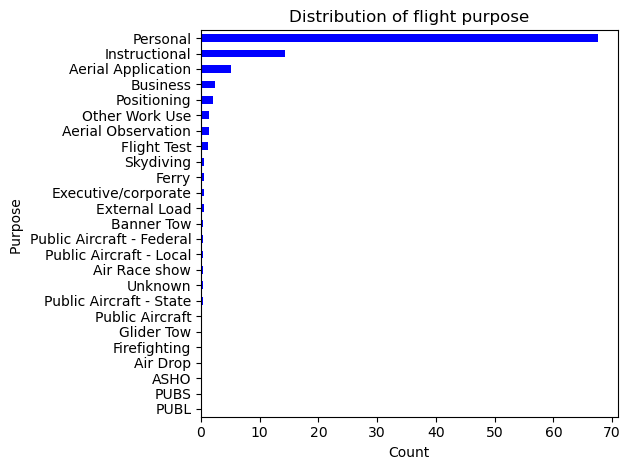

In [79]:
avg_flight_purp.plot(kind='barh', color = 'blue')
plt.title('Distribution of flight purpose')
plt.xlabel('Count')
plt.ylabel('Purpose ')
plt.tight_layout()
plt.show()

#### As from above, most people involved in these accidents were flying for personal reasons. It is expected that this makes the most of our data, precisely 67.55%. Investing in a commercial aircraft might be a better choice

#### It should also be noted that Instructional passengers also have a great contribution in the statistics, ammounting to 14% of the selected collection

### Identify State with the most plane crashes

In [84]:
unique_loc_count = df_relevant['Location'].value_counts().sum()
unique_loc_count


16882

The total number of unique locations is 16,882 

Next, we find the most common areas for plane crashes:

In [87]:
unique_loc = df_relevant['Location'].value_counts()
unique_loc

Location
Anchorage, AK        83
Palmer, AK           70
Talkeetna, AK        57
Fairbanks, AK        56
Phoenix, AZ          56
                     ..
Easton, MO            1
Dixie, GA             1
Thompsonville, MI     1
Wytheville, VA        1
Dacula, GA            1
Name: count, Length: 7069, dtype: int64

We need to identify the top 10 common areas for accidents

In [90]:
top_10_unique = unique_loc.head(10)
top_10_unique

Location
Anchorage, AK      83
Palmer, AK         70
Talkeetna, AK      57
Fairbanks, AK      56
Phoenix, AZ        56
Reno, NV           45
Houston, TX        43
San Antonio, TX    40
Oshkosh, WI        40
Las Vegas, NV      40
Name: count, dtype: int64

Let's visualize this in a plot

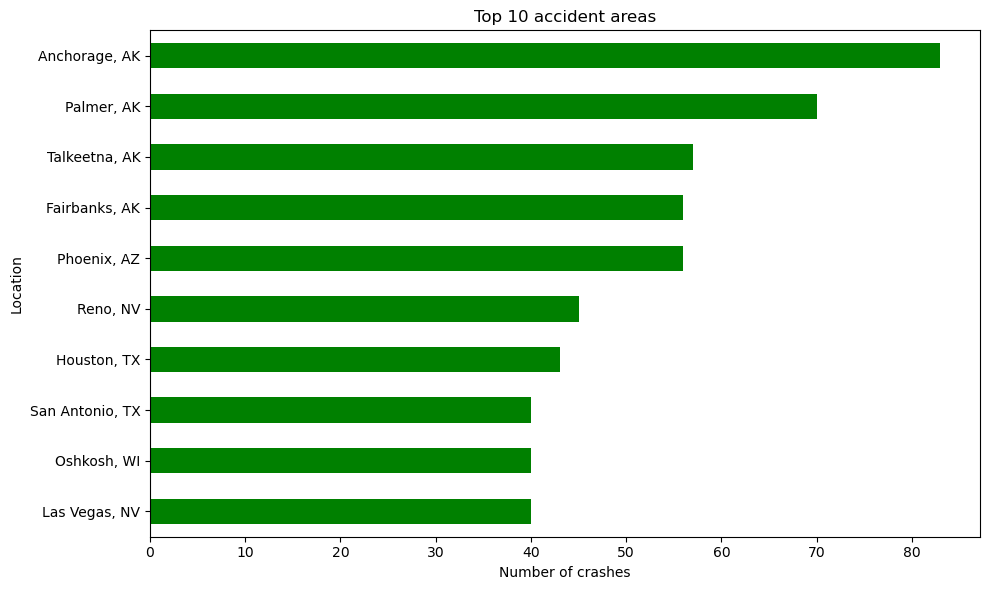

In [93]:

plt.figure(figsize = (10,6))
top_10_unique.plot(kind='barh',color = 'green')
plt.title('Top 10 accident areas')
plt.xlabel('Number of crashes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
           

As from above, Anchorage, Ak experienced the most accidents with 83 overral accidents

Following closely was Palmer, Ak with 70

### Effect of Weather Conditions to the overral safety of a flight

In [97]:
df_relevant['Weather.Condition'].value_counts()

Weather.Condition
VMC    16103
IMC      718
Unk       61
Name: count, dtype: int64

In [99]:
# We identify the percentage of each weather condition to the whole selected dataframe
percentages = df_relevant['Weather.Condition'].value_counts(normalize = True) * 100
print(round(percentages,2))

Weather.Condition
VMC    95.39
IMC     4.25
Unk     0.36
Name: proportion, dtype: float64


#### In this column, there are three values with different representations
#### 1. VMC : Visual Meteorological Conditions

There are clear skies and good visibility.

No reliance on instruments for navigation. 

VMC contributes to 95.39% of the total data

#### 2. IMC : Instrument Meteorological Conditions

Weather conditions requiring pilots to rely on instruments for navigation

Identified by poor visibility, clouds, fog and heavy precipitation

Contributes to 4.25% of the collected data

Conditions not suitable for visual flight

#### 3. Unk : Unknown

The weather condition is not reported or unknown

Could mean missing data or uncertain observations

Contributes the least to the data collection; 0.36%

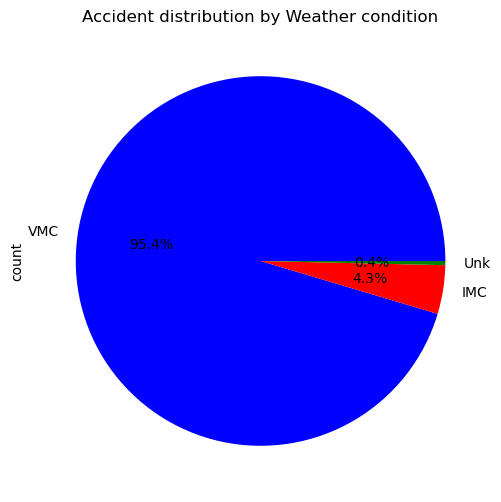

In [102]:
df_relevant['Weather.Condition'].value_counts().plot.pie(autopct = '%1.1f%%', colors = ['blue','red', 'green'], figsize = (6,6))
plt.title('Accident distribution by Weather condition')
plt.show()
          

#### As from above, we can identify that most accidents have happened on perfect weather conditions, so weather conditions do not play a large part in aviation accidents.


### Do varying engine types present different risk levels

In [106]:
enginetype_counts= df_relevant['Engine.Type'].value_counts()
enginetype_counts

Engine.Type
Reciprocating    15110
Turbo Prop         795
Turbo Shaft        724
Turbo Fan          162
Turbo Jet           64
Unknown             17
Electric             6
NONE                 2
LR                   1
UNK                  1
Name: count, dtype: int64

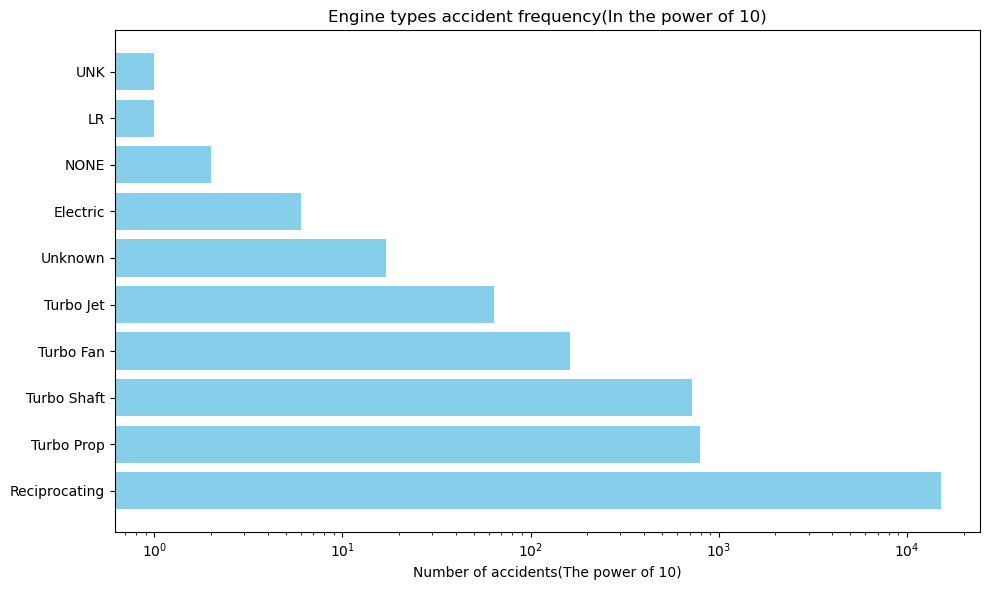

In [108]:
plt.figure(figsize = (10,6))
bars = plt.barh(enginetype_counts.index, enginetype_counts.values, color = 'skyblue')
plt.xscale('log')
plt.xlabel('Number of accidents(The power of 10)')
plt.title('Engine types accident frequency(In the power of 10)')
plt.tight_layout()
plt.show()
          

#### As from the plot, The reciprocating engine type is the most prone to accidents. The least prone engine being LR. There are a few engine types that are unknown but they have contributed to less than 1% of the data 

### Relationship between the number of engines in a plane and accidents

In [111]:
df_relevant['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    15541
2.0     1324
4.0        8
3.0        4
0.0        3
8.0        2
Name: count, dtype: int64

In [117]:
# calculate the contribution of each category to the overral accidents
percentage_contribution = df_relevant['Number.of.Engines'].value_counts(normalize = True) * 100
print(round(percentage_contribution,2))

Number.of.Engines
1.0    92.06
2.0     7.84
4.0     0.05
3.0     0.02
0.0     0.02
8.0     0.01
Name: proportion, dtype: float64


#### 92% of all the planes that were involved in an accident had a single engine

#### Planes with 2 engines contributed to 7.8% of the total accidents

#### planes with 3 engines had very little accidents(less than 1%) same as 4 engines and 8. 

#### This means that the more engines a plane has, the lower the risk

### Correlation Between an airplane make and the damage

In [121]:
df_relevant['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    15254
Destroyed       1420
Minor            202
Unknown            6
Name: count, dtype: int64

There are 3 distinct categories of aircraft damage:

#### 1. Substancial: 
This means that the damage adversely affects the aircraft's perfomance or flight characteristics.

Usually require major repair or replacement

### 2. Destroyed:
The aircraft is damaged beyond repair and is totally un usable

### 3. Minor Damage:
Superficial or very little damages. no serious effect on the aircrafts structural integrity or perfomance

Repairable without major work


In [124]:
df_relevant['Make'].value_counts()

Make
CESSNA               4509
PIPER                2709
BEECH                 894
BELL                  377
MOONEY                252
                     ... 
MOYES                   1
FLOYD JOSEPH B          1
GOTTSCHALK JOHN R       1
EVENS                   1
STEPHEN J HOFFMAN       1
Name: count, Length: 2992, dtype: int64

In [126]:
#We create a cross table for vuisualizing the results
damage = pd.crosstab(df_relevant['Make'], df_relevant['Aircraft.damage'])
damage

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Make,,,,
177MF LLC,0,0,1,0
2007 SAVAGE AIR LLC,0,1,0,0
2021FX3 LLC,0,0,1,0
781569 INC,0,0,1,0
AARDEMA ROBERT JOHN,0,0,1,0
...,...,...,...,...
ZIVKO AERONAUTICS INC,0,0,1,0
ZLIN,0,0,2,0
ZLIN AVIATION,0,0,1,0


In [128]:
damage.describe()

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
count,2992.000000,2992.000000,2992.000000,2992.000000
mean,0.474599,0.067513,5.098262,0.002005
std,7.275908,0.890599,90.440427,0.051679
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000
max,289.000000,39.000000,4179.000000,2.000000


#### As from above, we can see that most crashes had a substancial impact on mostly all planes. There is a very little relationship between the degree of damage and the make of the aircraft.

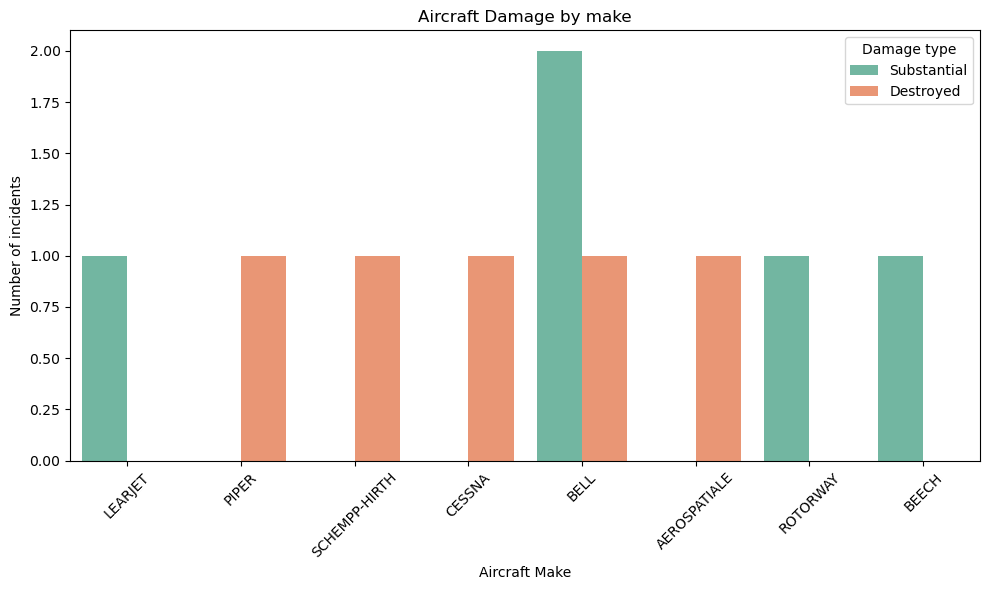

In [131]:
plt.figure(figsize=(10,6))
sns.countplot(data= df_relevant.head(10), x= 'Make', hue= 'Aircraft.damage', palette='Set2')
plt.title('Aircraft Damage by make')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of incidents')
plt.xticks(rotation = 45)
plt.legend(title= 'Damage type')
plt.tight_layout()
plt.show()

#### There is no visible correlation between an aircraft make and the impact of damage

### We also need to identify if there are certain airplane makes that are prone to accidents than others. This will help the company identify what makes to avoid and which to concider. 

In [135]:
makes = df_relevant['Make'].value_counts()
makes

Make
CESSNA               4509
PIPER                2709
BEECH                 894
BELL                  377
MOONEY                252
                     ... 
MOYES                   1
FLOYD JOSEPH B          1
GOTTSCHALK JOHN R       1
EVENS                   1
STEPHEN J HOFFMAN       1
Name: count, Length: 2992, dtype: int64

In [137]:
(4509/makes.sum())* 100

26.70892074398768

In [139]:
(2709/makes.sum())*100

16.046676934012556

In [141]:
bottom_10_makes = makes.head(10)
bottom_10_makes

Make
CESSNA                 4509
PIPER                  2709
BEECH                   894
BELL                    377
MOONEY                  252
ROBINSON HELICOPTER     197
ROBINSON                177
AIR TRACTOR INC         174
CIRRUS DESIGN CORP      167
BELLANCA                159
Name: count, dtype: int64

In [143]:
top_10_makes = makes.tail(10)
top_10_makes

Make
SKY INTERNATIONAL, INC.    1
NICHOLSON                  1
POLARIS                    1
MILLS                      1
QUASAR ACFT CO LLC         1
MOYES                      1
FLOYD JOSEPH B             1
GOTTSCHALK JOHN R          1
EVENS                      1
STEPHEN J HOFFMAN          1
Name: count, dtype: int64

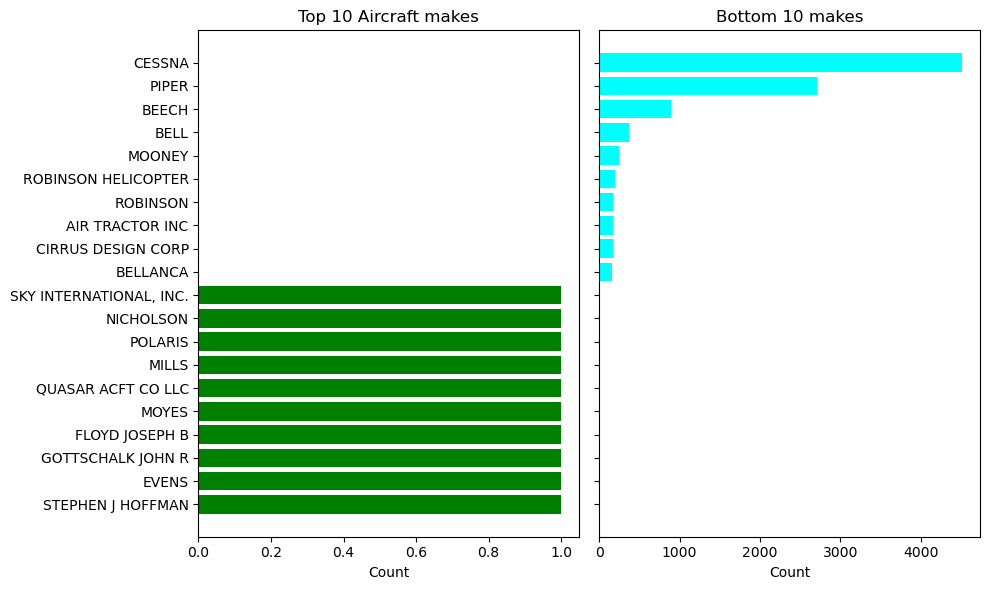

In [146]:
fig, axes = plt.subplots(1,2, figsize =(10,6), sharey = True)
axes[0].barh(top_10_makes.index[::-1], top_10_makes.values[::-1], color = 'green')
axes[0].set_title('Top 10 Aircraft makes')
axes[0].set_xlabel('Count')
axes[0].invert_yaxis()

axes[1].barh(bottom_10_makes.index[::-1], bottom_10_makes.values[::-1], color = 'cyan')
axes[1].set_title('Bottom 10 makes')
axes[1].set_xlabel('Count')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

                   



#### The aircraft make which is most prone to accidents is the cessna, with accidents ammounting to 4,509 in our sample data, contributing to 26.7% of all the accidents

#### Closely following is  the piper, contributing to 16% of all the accidents in our sample

#### Some of the least prone planes are STEPHEN J HOFFMAN and EVENS. However, it should be noted that these plane makes are not very common, which means that the probability to be involved in an accident is very low, unlike the Cessna and the Piper

This sample data will be saved as an excel file for more visualizations in Tableau


## Findings

- In the first decade (1990's), accidents we significantly low, displaying 6 accidents in the decade. Air as a means of transport was not adopted then
- An 18.4% increase in accidents was witnessed in the second decade (2000's). Air was becoming more popular among people and industries, but the safety measures were neglected.
- As we transitioned to the third decade, accidents significantly increased (54.3% increase). Air as a means of transport was highly adapted and many aircraft companies were established then. However, there were still few safety measures and  everyone was racing for profits thus the 'spiked' rate of accidents.
- A 64.2% drop in accidents was seen as we transitioned to the present decade. High policies were implemented and human life is prioritised more than anything else. This is a very positive step towards a safer future in air travel.
- Most accidents happen in perfect weather conditions. This is to show that weather conditions have a very low impact on plane crashes and accidents
- Some locations, like Alaska in USA have been prone to accidents with Anchorage experiencing over 83 accidents. This can be attributed to the snowy weather conditions which are prevalent in those areas
- Damage impact has no significant relation with the make of the aircraft.
- The more the engines in a plane the fewer the chances of being involved in an accident. planes with 1 engine have contributed to 92% of the accidents. That's quite a significant number.
- The Reciprocating engine is the most prone to accidents. This engine alone contributed to over 90% of the total accidents
-  The aircraft make which is most prone to accidents is the Cessna, with accidents amounting to 4,509 in our sample data, contributing to 26.7% of all the accidents
-  The Piper make contributes to 16% of the accidents.
-  Some very obscure makes of planes and aircrafts are the least in terms of accidents. This does not necessarily mean that they are safe. Maybe their scarcity is the cause of their little contribution to the statistics
- Most people that use air as a mode of transport are flying either due to personal reason or instructional reasons

## Reccomendations
1. Concider purchasing aircraft makes like Robinson and Beech, which mantain a balance between popularity and safety
2. Twin engine planes are the best. Their prices are fairly reasonable and the safety is topnotch
3. Routes are a key concideration, so avoiding routes like Alaska, USA might play a huge part in reducing risk
4. UNK and electric engines might be a better choice. Avoid the reciprocating engine
5. Now is the best time in history for a company that wants to invest in the aviation industry

# Conclussion
Air travel has never been safer than it is now. With so many policies put foward and the high regard for human right, the air space has become very safe and convenient for travel.

Accidents are said to be part of nature. It is not in any person's capability to control that. However, calculated statistics help us minimise the likelihood of such to happen in the future.

We need to also sensitize our staff to adapt safety measures like checking for technical defects, system malfunctions and any other faults before takeoff. They are also advised to mantain a high discipline.

With every accident that has happened, a safety measure has been implemented to avoid another loss of life for the same cause.

In conclussion, aviation industry is becoming safer and more profitable with time, and this business should concider investing in the industry

In [154]:
#Saves the data locally
df_relevant.to_excel('aviationR_data.xlsx', index = False)
